In [1]:
import pandas as pd
import scanpy as sc
from dataset import *
from models import *
from trainAndTest import *

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [3]:
microglia = sc.read_h5ad('../data/rosmap/microglia.h5ad')
metadata = pd.read_csv('../data/rosmap/rosmap_clinical.csv')

C:\Users\limmi\Documents\Pytorch\venv\Lib\site-packages\anndata\compat\__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [4]:
print(microglia.obsm["X_umap"])

[[ 4.79232255 -6.05808624]
 [ 0.56998137  2.43791786]
 [-0.31325134  2.19283989]
 ...
 [ 1.30899597  3.10557238]
 [-0.81037315 -1.71854791]
 [-3.91768917 -1.88798102]]


In [9]:
columns = [
        "individualID", "braaksc", "ceradsc", "cogdx"
]

# columns2 = [
#     "individualID", "braaksc", "ceradsc", "age_at_visit_max"
# ]
# Select and clean relevant metadata
metadata = metadata[columns].dropna()
metadata["cogdx"] = metadata["cogdx"].astype(int) - 1
metadata["ceradsc"] = metadata["ceradsc"].astype(int) - 1
metadata["braaksc"] = metadata["braaksc"].replace({0: 0, 1: 0, 2: 0, 3: 1, 4: 2, 5: 3, 6: 3})
metadata["cogdx"] = metadata["cogdx"].replace({0: 0, 1: 1, 2: 1, 3: 2, 4: 2})

In [10]:
braakids = ['R3741788','R3844037','R9088015','R5636935','R4078277','R6352950'
,'R9163526','R6627307','R7347788','R7698313','R3769291','R6849345'
,'R1830086','R3198654','R5158294','R5574987','R7210604','R9817161'
,'R5992638','R7903817','R6415047','R2575548','R3322663','R3825485'
,'R8316516','R3589148','R5789564','R4859661','R7944883','R9936070'
,'R1028639','R5766881','R7039412','R7738727','R3739042','R8451530'
,'R1476204','R5907586','R5385855','R1015854','R4790045','R3368249'
,'R3400726','R5927382','R5541746','R8155560','R2079629','R9976232'
,'R8444624','R9489952','R2992930','R2398607','R1664857','R8209563'
,'R7915228','R1489314','R6292415','R3864948','R8678748','R5210462'
,'R6280004','R6155093','R5893965','R5629689','R6679530','R7063792'
,'R3176125','R1588427','R4012015','R8472815','R6828280','R6600608'
,'R4927046','R6070702']
braakindex = [1661,3757,583,2875,1294,3978,3314,2587,1501,269,305,2104,1677,245
,1620,1747,2770,1058,786,609,370,3772,216,3398,3430,142,754,3411
,2352,37,1966,2973,980,3629,2145,381,2523,2506,2276,518,1396,2803
,2098,3235,2896,2348,2166,2343,3352,2210,439,3131,2050,3738,2841,433
,3158,3625,2739,1381,398,2369,3574,1260,104,109,1088,1318,2323,3842
,2861,1517,1607,1067,62,3704,1443,1285,2701,819,1669,2982,3173,2610
,847,2788,2277,342,2309,1855,556,967,248,38,2872,877,1598,1484
,1676,2067,2987,1409,146,2810,3961,1995,397,1526,3179,3316,2124,2928
,3177,3209,3330,2827,3050,221,2222,1972,3712,2102,2001,1230,2066,1949
,2418,1030,3460,1525,1807,361,2696,2569,1116,3328,2925,1799,1424,2158
,1581,3680,2984,2974,871,3847,1109,202,408,492,151,3606,26,1098
,2024,1733,3305,2971,2999,2090,2852,2284,1462,2729,3281,1153,2711,3457
,3527,2961,2325,1912,1034,821,3349,673,192,2251,3630,2331,2911,939
,745,2517,476,2839,3509,2078,3536,631,3294,3955,3664,1193,1845,3161
,766,1622,1533,3959,2946,2902,3639,2856,2885,2687,352,3150,161,1482
,918,1365,2328,594,3432,927,2926,3473,116,1114,520,2740,118,80
,484,94,1916,1435,3577,2048,851,2286,2077,1051,1675,3652,1610,2623
,3151,697,1319,3649,1975,3091,394,3126,2964,1135,2576,229,1893,2712
,277,982,2426,1458,604,2243,3692,2118,1612,2649,3780,1892,1356,1117
,2887,1242,3820,2180,1637,3378,2302,2950,1593,599,268,2315,544,1846
,2821,3690,2895,3109,3351,1357,2615,920,2474,471,2495,39,3391,468
,1866,290,1470,974,409,1603,3111,1592,945,2614,825,3412,2514,1398
,678,3208,1730,3376,937,8,2855,3259,548,1897,2299,1119,3084,2716
,1157,1707,2718,698,1127,2076,2801,3132,181,978,2757,1495,1151,252
,753,3665,3616,788,3612,2830,907,3502,3608,208,990,1926,1936,1771
,1847,427,557,2218,1179,2062,2493,2897,853,1648,1373,2191,233,3326
,191,3667,1694,1463,3171,2391,1039,3583,34,1699,1840,2761,2665,1734
,2694,2342,3497,1954,622,1369,2411,1472,1050,2634,2017,3804,532,3982
,415,1247,3578,1091,2399,3423,389,3743,3670,2432,589,2271,2410,189
,1441,2479,358,3446,1512,1485,1551,2237,428,2417,2144,2020,2812,542
,2968,1776,1870,2814,1585,1188,1402,1816,3347,3226,833,541,875,3884
,2134,3155,379,1447,3516,3239,3835,676,1113,2469,275,2435,410,341
,1982,75,3137,3582,1739,530,2570,29,645,3487,3870,1382,72,2436
,3957,3874,3435,680,498,574,1361,1850,2214,2747,762,1363,27,2282
,3264,2583,3371,1990,2347,1159,1894,571,1653,2750,634,3991,1226,3014
,1003,1640,2725,3554,3010,695,2110,540,1172,3550,3660,2381,2662,203
,3212,145,2674,52,3408,3227,3112,32,3099,2669,130,1142,763,2768
,3706,1237,1999,570,2117,2263,1521,1994,3481,2564,418,1992,2316,1339
,3265,2519,527,1189,2572,685,3249,3475,1901,580,2844,2883,3165,3333
,2653,994,2777,2698,861,3138,2230,3323,231,3274,2440,2807,3200,2589
,3728,1902,3451,906,1419,444,1089,3019,2283,1910,593,1634,3028,33
,402,2791,1770,651,1674,3266,1685,295,2249,2884,575,1617,2965,805
,3715,1638,3077,1479,2985,2916,949,2979,3011,3476,2936,473,3291,2274
,2254,576,1023,2704,3944,3424,3837,1572,2630,3613,3492,1150,1961,2748
,791,3012,1654,3045,3803,1599,1464,1922,865,1466,1187,2433,3042,3632
,3766,3721,1308,1015,83,199,2956,621,3108,2301,537,2779,447,942
,280,93,3681,3731,1229,2091,550,3981,529,2154,3450,3538,3732,2174
,2910,957,2485,509,2458,679,2209,2567,2262,3329,716,210,933,2204
,2226,600,2726,2058,2914,1852,2434,1963,1673,2782,1948,1446,708,3666
,224,1567,1557,3663,614,1588,765,985,2838,2960,1864,2374,741,124
,238,66,785,3096,1407,24,1842,931,2334,2005,3361,1129,2746,1325
,1273,1872,3290,747,3703,1041,3940,2208,2083,2103,2002,2617,2962,77
,1371,3270,378,1401,3275,3505,1664,3539,2991,315,472,2539,965,3327
,1625,1544,3000,1204,3215,3452,113,2813,115,1951,3095,2216,1580,578
,3741,2775,3518,2105,1293,3581,13,3713,838,2099,3375,1362,743,2738
,3317,2680,608,91,1763,3973,2990,2447,720,1778,2769,1900,1769,1268
,218,1613,2176,3100,2295,1686,800,1264,3662,487,3853,3969,2660,3677
,3102,1069,3405,3745,3027,2401,1075,3,481,3631,2720,3153,3832,2003
,2593,474,1720,3364,2530,2197,2441,3477,278,635,1849,3040,3519,956
,2692,209,3711,3898,2899,504,649,288,2693,3854,1444,1311,207,1033
,3490,935,3525,53,3093,3493,3049,211,2929,555,1819,455,3585,2642
,878,1684,3779,2444,2147,1540,3781,3272,2182,3945,1341,2446,1508,2525
,3340,1253,1166,1871,3936,726,2780,1209,630,2913,1133,2466,2989,1867
,3273,3237,521,3921,3064,1761,3584,316,496,1460,558,3590,1960,2565
,488,64,3975,3119,3880,1978,3038,129,3436,2659,1354,2233,2409,894
,1233,84,1167,3603,296,2439,1503,3586,1195,330,2290,1163,1991,3799
,1046,1249,3236,2142,3007,2183,2244,3638,2431,1898,2579,2194,3278,3899
,2365,3214,2527,682,3295,1191,1220,3360,150,3878,424,979,3563,2022
,292,2681,3342,2335,373,1459,157,475,3976,3915,3262,41,3104,2797
,3065,3972,3002,3974,323,3966,2265,3285,3819,3965,1812,3967,3564,2345
,627,3280,3971,3968,3970,3003,817,755,3358,3560,2042,1385,3321,213
,2161,2824,1414,1252,1055,1751]
ceradids = ['R9116123','R2670295','R3741788','R3579460','R5636935','R1969233'
,'R4078277','R7767837','R8998310','R4174623','R2645101','R1830086'
,'R3078606','R5158294','R5574987','R3607578','R5992638','R7903817'
,'R2859649','R6003498','R4249236','R9245150','R3825485','R1583702'
,'R2793780','R2488731','R7066784','R1344510','R6478102','R1617674'
,'R9596785','R7796947','R6114572','R8293796','R1531359','R4361022'
,'R1236313','R1015854','R5405023','R3111222','R8937093','R4790045'
,'R3400726','R5541746','R2079629','R2264515','R1218460','R3922205'
,'R2992930','R9817056','R7915228','R6108690','R7959406','R2347173'
,'R7950545','R5573393','R8678748','R5126867','R7702934','R9886653'
,'R5893965','R2787688','R1133959','R9794121','R6216782','R3176125'
,'R4012015','R1620679','R2577726','R3811781','R6828280','R7304869'
,'R5133113','R1933335']
ceradindex = [216,918,381,2532,729,1489,3772,2612,2066,1620,967,3625,2873,2832
,2380,2418,2721,141,2210,3393,1429,73,609,2277,3314,1576,439,2148
,195,3629,2055,1669,342,42,245,398,1230,2875,2973,1294,370,3806
,1300,847,1088,2352,208,3352,3330,1452,2369,2506,1995,2145,1179,2872
,583,2896,1370,1381,2050,2987,3157,782,2090,745,221,1845,619,3398
,2558,677,408,3158,3688,476,1604,3472,3954,697,1707,2348,3527,599
,3209,2299,2701,3961,2827,2841,2158,2928,2104,3131,3506,2166,1821,1583
,37,1496,1482,2325,2124,1462,1065,1260,3457,3430,492,1409,2067,1318
,2222,1813,1799,2343,3616,3502,2284,2961,3842,2640,2946,3723,2309,2803
,1912,814,2740,3177,3818,2021,2102,2861,1365,1030,1972,3259,3025,1675
,146,352,1319,2711,2276,2788,3050,1443,821,877,1424,1146,3847,2495
,62,2810,1607,26,2974,309,3664,1525,2302,1966,277,908,3328,2982
,520,2098,2485,1135,945,2971,939,518,361,1091,1484,3349,1598,2243
,1622,2729,1824,2926,151,2887,2328,118,3630,3460,290,3316,94,1676
,192,631,3692,1866,80,3305,2902,2180,2315,1435,2712,927,1892,3473
,2048,2076,3577,3091,1396,394,974,1949,1581,2514,1893,1247,1098,851
,3151,3574,1034,2078,2024,116,766,2286,1610,3639,2251,3690,3294,1526
,229,2331,3820,594,2569,1153,3959,2118,2696,3606,2077,2020,673,3652
,191,3955,1916,1109,2017,3126,468,161,2687,1533,2474,1846,1637,1114
,1926,1807,1734,2614,2694,2280,2856,252,3235,1699,1119,2391,2426,3432
,557,3111,202,2718,1382,1855,3351,3649,39,2950,3420,1975,2839,3391
,2999,1470,3150,2649,1050,2885,2517,2964,2623,698,3536,1458,2895,1242
,3743,548,2576,1373,3132,937,3780,181,1151,3667,427,978,2615,1730
,1117,678,1776,2757,471,2855,2761,233,2984,268,2479,1051,753,875
,1603,2830,907,2410,1936,604,2821,3226,2283,3497,1127,8,1612,1648
,1551,27,72,1593,1733,3376,532,2716,1472,1870,1592,389,2062,825
,990,1357,1954,1847,3412,3612,920,498,3171,788,358,1463,2814,1113
,1585,1369,1495,2911,3161,530,2812,3208,3884,2897,1771,3608,2218,541
,2411,2469,3670,542,1816,574,2191,3804,3475,1694,3578,2436,2570,428
,3582,544,1897,1157,3982,1441,3665,1039,1188,2665,3264,3957,275,3227
,3326,853,2230,2282,341,2801,3347,2883,1673,1739,410,676,2134,3155
,409,3084,75,3583,1402,833,2968,1447,3239,571,2347,3516,415,3509
,1356,1982,3870,3613,982,2342,3660,3423,1512,3446,2399,622,379,2634
,645,3715,34,2214,1363,2417,2750,1840,2435,189,1990,130,838,3408
,1003,3874,2144,484,540,2271,2110,1172,1226,570,3265,2844,418,3835
,1237,2254,695,3109,3010,2662,29,2807,1361,2768,2572,2669,3212,3550
,3165,32,2432,1189,3731,3014,3538,2117,2747,1994,1685,145,3487,3274
,1674,280,3732,444,1901,3137,994,1850,3435,2791,2979,1894,805,1653
,2775,3706,1159,1142,949,447,1640,2519,3045,762,3371,402,3099,1150
,3323,52,1999,1617,3837,1023,3138,2237,231,2564,203,2884,1339,2725
,2965,1902,3200,3019,3112,1654,679,3991,763,1910,1479,33,3721,2985
,3554,1634,2674,575,1089,2440,680,906,1521,509,651,3028,1464,2653
,791,3766,3728,3266,1015,2630,2433,3333,3476,685,2589,2936,1992,634
,295,865,2704,2583,1770,1041,3011,3481,93,2916,473,593,3249,3424
,3632,2777,3803,3451,861,2249,1572,2316,527,3681,2698,580,933,1466
,2262,3291,1187,3450,1599,3492,576,2956,1419,708,2748,2726,2274,1922
,3944,2204,3108,1638,83,2174,1961,2103,3042,1229,1398,550,1308,2960
,2910,2154,2779,3012,1325,2209,600,621,1842,957,942,2301,2458,2226
,2263,1852,2782,614,741,2838,1963,1273,1948,2091,2434,3663,2005,1778
,2058,716,1864,1446,2381,537,2567,3290,199,3981,3329,765,1129,529
,3703,785,1204,3275,1588,3096,2914,2746,124,1557,1407,3539,2334,2374
,747,985,931,3940,378,2002,210,66,1872,2105,238,2208,3666,1951
,77,1664,3452,1580,2769,1371,2216,472,2617,2083,113,3000,315,3270
,1401,1567,115,3518,3327,2539,3361,1769,3505,1625,481,2447,3077,1544
,608,2680,965,3375,3713,2962,24,1293,1268,1686,2813,3215,1900,91
,1362,2738,1613,13,3741,2099,2991,3317,3581,743,800,218,720,2990
,2176,487,1763,3973,3095,1849,3969,3405,3100,3832,224,1069,2660,2530
,3364,3677,3153,2295,3662,1264,578,635,474,3,2441,2929,278,2003
,3102,1075,2899,3272,3040,3027,2693,3853,1720,3631,3519,3745,2593,2401
,2720,956,3477,3711,209,2197,3525,2446,504,2692,288,3898,3490,1033
,2642,1311,3493,1444,3273,935,1341,207,2444,3093,649,1684,3945,455
,3049,555,2147,2182,53,1819,878,3781,3340,3779,1253,129,726,3854
,1508,1871,521,3585,1166,630,1209,1761,1540,2989,211,3237,2913,2466
,1867,2780,3921,3936,3064,558,1460,3584,1133,3590,64,2525,1167,1960
,316,3880,3975,496,488,3119,2183,296,2659,1354,3603,2565,330,84
,3799,1195,3038,894,1046,2233,3436,1503,1978,1233,2439,1163,2290,2409
,1991,1249,2244,3638,3236,2142,3586,2579,2194,2365,1898,2431,3278,3007
,3214,3899,3878,2527,682,1191,3360,979,3295,292,1220,2681,3563,150
,424,2022,475,373,1459,2335,3976,157,3915,3262,3342,3002,3065,2797
,41,3104,3972,323,3966,3974,3285,2265,755,1812,3819,3965,3967,2345
,3564,3003,627,3280,3970,3971,817,3968,3358,3560,2042,213,3321,1385
,2824,2161,1414,1252,1055,1751]
cogdxids = ['R5693901','R6759986','R3579460','R1969233','R7090624','R4388056'
,'R2197944','R6132310','R4242008','R6352950','R9163526','R6627307'
,'R3452739','R9582641','R3257830','R1830086','R3198654','R3078606'
,'R3426726','R3857147','R9907075','R2859649','R7758743','R4249236'
,'R8316516','R2793780','R3589148','R2488731','R9936070','R3328867'
,'R2895885','R9255058','R8704458','R3739042','R7334123','R8293796'
,'R1015854','R7874995','R8937093','R5541746','R9489952','R5211056'
,'R8882846','R6939144','R5177066','R9817056','R6698302','R1664857'
,'R8209563','R4581557','R2167020','R7959406','R1547566','R8724814'
,'R2347173','R9764427','R5126867','R6280004','R9886653','R5893965'
,'R2787688','R2144127','R9794121','R1234575','R1721075','R3811781'
,'R9652199','R2879330','R5394614','R5518725','R8472815','R8003745'
,'R7029629','R8093392']
cogdxindex = [3480,2873,3680,2276,3322,1456,606,3478,2925,3025,104,109,1912,1056
,1821,1886,518,2210,3629,1995,230,2987,1624,1452,3577,69,1257,3818
,1669,3030,1578,3688,492,2220,3978,3506,2788,1604,3842,3366,819,904
,1153,2736,1044,2166,2343,2067,769,2277,3772,3179,2309,908,2937,2055
,2506,182,531,3587,2701,502,1859,3352,2050,2896,1234,3305,26,361
,309,245,2722,208,1260,3330,987,847,3574,3177,2852,38,398,2841
,2827,1294,631,1214,821,1065,1855,2352,1677,1296,1318,3158,2640,2587
,2875,192,37,3649,2740,1409,782,3712,2102,2078,305,556,2861,1500
,1193,3527,1607,408,269,2961,3884,2984,1966,1526,2024,2325,1622,2331
,3131,1972,1353,1285,542,2902,394,677,3316,3630,3955,2369,2982,3314
,619,2971,1892,814,2885,2687,2315,1525,1319,1824,2872,3723,3349,3904
,277,1357,202,1533,1117,1119,2974,1135,3393,2017,2222,1030,2323,974
,146,2523,2066,1496,877,2729,118,3050,2696,3328,1098,1949,3639,2576
,1845,2280,1034,745,2712,3847,1610,352,673,2928,116,2418,1598,3378
,1435,476,1707,252,1846,2839,599,1373,2946,3151,1443,2887,94,1675
,290,3664,3692,1230,1179,2711,161,2302,1484,3957,3432,3616,1091,3652
,1242,3959,1114,433,1637,1807,2243,594,2286,3460,3412,1734,2048,2926
,2614,3430,3294,2180,2856,2950,2474,1396,1581,2514,151,678,1365,1866
,2569,1003,2328,3608,766,3264,1458,3780,3239,3235,557,1470,1050,229
,1495,788,268,2718,520,1975,548,1699,468,2615,2076,697,1472,2895
,2426,982,1146,3795,2251,3606,1127,1893,1916,2062,471,2897,2347,825
,3109,8,2761,875,1936,1603,1592,3690,1462,191,927,248,62,181
,1109,920,945,853,3502,1816,3351,3132,1897,2495,2964,3084,3509,3743
,233,532,1247,80,3391,415,2810,2077,676,1151,3376,1799,2801,2716
,3667,2218,604,3126,2814,484,574,1926,907,3423,698,3835,3161,1840
,3150,2436,2391,2999,75,3208,1648,3820,34,1730,1157,1369,3171,3538
,1771,937,2283,410,3091,978,990,1593,1612,27,72,2493,3227,3870
,541,851,3111,498,2821,544,39,130,3536,2410,2830,530,2623,2230
,1739,3665,341,753,3516,2144,1512,2191,3137,3323,3670,3326,2725,3259
,1733,3497,3475,2812,1113,2757,1039,2118,2479,1382,2519,3583,1776,2517
,358,428,939,3582,3420,275,389,427,2214,1188,1402,2282,3874,2968
,2342,3347,1982,1990,2117,1694,1847,2911,1051,2570,2110,2411,2417,379
,527,2134,622,2105,1551,3476,3155,189,833,409,1585,589,3099,2844
,2665,1870,2750,3165,2634,3982,2435,3578,570,3612,1894,3804,2883,1419
,2855,1172,2271,33,1189,645,2440,805,1521,763,1237,3226,1479,2469
,29,1356,1485,2399,52,634,1089,2564,2747,3487,231,2791,3045,1441
,3265,3550,1850,3266,3333,679,3019,1150,3371,2263,2237,1463,145,2432
,1640,2916,3732,1142,580,2768,3435,3991,280,1674,1447,1653,861,1910
,575,1999,3014,3291,3446,762,2583,1363,3632,3706,509,695,2662,3112
,540,1634,3728,1685,994,1673,1992,203,3010,1902,3731,3660,3012,2884
,651,1226,3408,3138,1654,2748,1961,2965,680,2777,3451,3274,2936,685
,2779,2807,1994,2630,2979,791,3028,444,3212,1638,593,906,418,2433
,1770,1159,1599,3424,1023,957,1361,3249,1464,3200,2091,3554,621,2274
,1588,1901,402,447,3803,1954,1339,2698,1398,3944,2669,949,3981,2674
,3715,3329,3721,2910,2782,765,2653,3011,2694,2769,1041,3492,2381,1572
,571,3042,93,3450,1229,2458,576,2914,2334,3837,3481,32,2704,2539
,2572,1015,747,2567,295,865,2174,2249,2316,1864,83,473,2985,2226
,1308,1842,2262,3703,2956,933,2002,1401,3766,3275,2434,2301,1446,2254
,3681,1922,2103,3108,3663,1557,2374,708,3270,3215,2209,2838,2204,1617
,1849,210,600,741,931,550,985,24,3666,1872,537,1664,199,942
,1852,3741,2485,124,2726,77,238,1963,3539,3096,2589,529,378,2746
,3290,315,614,2099,1325,1567,3361,1948,66,1686,1129,1407,472,1293
,2005,115,1625,965,2083,91,2295,3095,1769,800,3000,2813,2680,224
,2738,743,2058,2617,1362,785,1951,3505,3452,2216,3518,113,2154,1268
,2208,3375,1371,3613,716,608,1204,1273,3040,2960,2775,3317,3077,2962
,1187,481,720,1613,1466,1778,3581,1580,3713,3662,3100,3940,3327,3153
,1544,3745,2692,13,3027,2003,2990,1075,1900,578,2197,2441,3973,3898
,2660,209,218,838,3405,487,1264,3677,2991,2401,2176,3477,278,1720
,3,3832,956,1069,1763,3711,3969,3102,635,504,3093,2593,2182,3272
,935,2899,207,3853,3519,1819,2720,1444,474,3049,3490,288,2447,2530
,3493,3364,1311,2446,649,630,3779,3525,3273,53,3945,1033,555,1684
,2642,1341,2147,1166,3631,3854,2444,1253,211,726,2929,3781,64,521
,1209,1871,1540,1133,2780,3585,3921,129,2693,2466,3936,3603,2989,878
,3340,455,1508,1460,2913,558,1978,3064,1867,3237,3590,1960,2659,3880
,2525,1761,1233,3119,316,1503,3975,488,3436,2439,3584,496,84,3799
,1046,2565,1195,1354,3038,2431,894,2233,1249,2409,296,1991,1163,1167
,2290,3638,330,3899,2142,1898,1220,2244,3007,3586,2194,3278,2579,3214
,3236,2365,2681,2183,1191,979,2527,682,3878,3295,2022,424,3563,3360
,150,475,3915,373,292,1459,157,2335,41,323,3342,2797,3262,3976
,3065,755,3104,1812,3002,2265,3972,2345,3974,3966,627,3280,3819,3564
,3285,3967,3965,817,3003,3321,3971,3968,3970,3358,3560,2042,1385,213
,2824,2161,1414,1055,1252,1751]
braakdict = dict(zip(metadata["individualID"], metadata["braaksc"]))
ceraddict = dict(zip(metadata["individualID"], metadata["ceradsc"]))
cogdxdict = dict(zip(metadata["individualID"], metadata["cogdx"]))

braakmodel = MultiTaskModel(input_dim=1000, num_classes_list=[4, 18], task_types=["coral", "classification"])
ceradmodel = MultiTaskModel(input_dim=1000, num_classes_list=[4, 18], task_types=["coral", "classification"])
cogdxmodel = MultiTaskModel(input_dim=1000, num_classes_list=[3, 18], task_types=["coral", "classification"])

braakmodel.load_state_dict(torch.load("allTasks/Braak_CTmodel.pth"))
ceradmodel.load_state_dict(torch.load("allTasks/CERAD_CTmodel.pth"))
cogdxmodel.load_state_dict(torch.load("allTasks/Cogdx_CTmodel.pth"))

<All keys matched successfully>

In [11]:
stateDict = {
            "Mic.1": 0,
            "Mic.2": 1,
            "Mic.3": 2,
            "Mic.4": 3,
            "Mic.5": 4,
            "Mic.6": 5,
            "Mic.7": 6,
            "Mic.8": 7,
            "Mic.9": 8,
            "Mic.10": 9,
            "Mic.11": 10,
            "Mic.12": 11,
            "Mic.13": 12,
            "Mic.14": 13,
            "Mic.15": 14,
            "Mic.16": 15,
            "Macrophages": 16,
            "Monocytes": 17
        }

In [17]:
# first try braak mic11, mic15 good, mic13 mic1 mic9 bad
testBraak = microglia[microglia.obs["individualID"].isin(braakids)]
testBraak = testBraak[:, braakindex]
testBraak.obs["state"] = testBraak.obs["state"].map(stateDict)

C:\Users\limmi\AppData\Local\Temp\ipykernel_18400\4264455571.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  testBraak.obs["state"] = testBraak.obs["state"].map(stateDict)


In [18]:
X_test = testBraak.X
y_braak = testBraak.obs["individualID"].map(braakdict)
y_cell = testBraak.obs["state"].values

14100


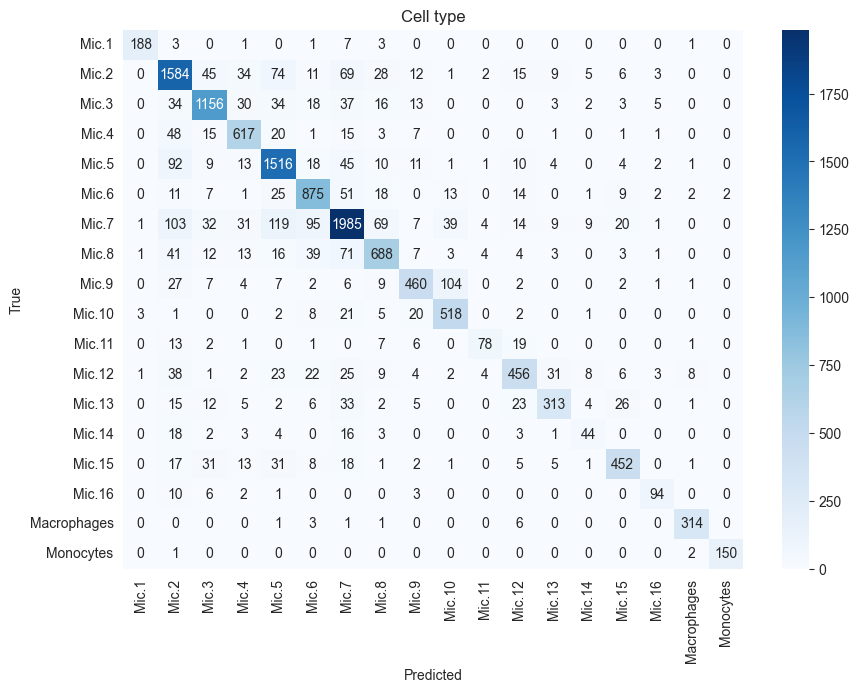

In [19]:
tensor = torch.tensor(X_test, dtype=torch.float32)
braakmodel = braakmodel.eval()

output = braakmodel(tensor)
preds = output[1].argmax(dim=1)

print(len(preds))

plot_confusion_matrix(y_cell, preds, stateDict.keys(), "Cell type")



In [33]:
from collections import Counter

correctCells = []
totalCells = []
braakScoreCells = []

for id in braakids:
    cells = testBraak[testBraak.obs["individualID"] == id]
    cellTensor = torch.tensor(cells.X, dtype=torch.float32)
    braaksc = braakdict[id]
    cell_types = cells.obs["state"].values
    
    
    with torch.no_grad():
        output = braakmodel(cellTensor)
        pred_class = (output[0] > 0.5).sum(dim=1).numpy()
        pred_cells = output[1].argmax(dim=1).numpy()
    
    classCounts = dict(Counter(pred_class))
    if braaksc in classCounts.keys():
        predMax = classCounts[braaksc]
    else:
        predMax = 0
    #predMax = classCounts[braaksc]
    guess = max(classCounts, key=classCounts.get)
    
    if guess in classCounts.keys():
        guessCount = classCounts[guess]
    else:
        guessCount = 0
    total = sum(classCounts.values())
    
    #create mask of for which cells braak score is precicted correctly
    mask = (pred_class == braaksc)
    
    cellacc = (pred_cells == cell_types).sum()
    if guess == braaksc:

        # print(f"ID: {id}, Braak score: {braaksc}, Predicted score: {guess}, Count: {predMax}/{total} ({predMax/total:.2%}), Cell type accuracy: {cellacc}/{len(cell_types)} ({cellacc/len(cell_types):.2%})")
        

        correctCells.extend(pred_cells)
    braakScoreCells.extend(pred_cells[mask])
    totalCells.extend(pred_cells)
#plot_confusion_matrix(true, pred, ["Low", "3", "4", "High"], "Braak score")

correctCounts = pd.Series(correctCells).value_counts()
totalCounts = pd.Series(totalCells).value_counts()
braakScoreCounts = pd.Series(braakScoreCells).value_counts()
# print("Correct counts", correctCounts)
# print("Total counts", totalCounts)

print(f"Correct cells: \n{correctCounts}")
print(f"Braak score counts: \n{braakScoreCounts}")
print(f"Total cells: \n{totalCounts}")


Correct cells: 
1     712
4     591
6     555
2     422
14    391
5     275
3     226
8     219
9     154
11    148
7     145
16    107
12     54
17     45
0      39
15     35
13     15
Name: count, dtype: int64
Braak score counts: 
1     650
4     575
6     559
2     388
5     349
3     222
7     212
14    196
8     165
11    155
9     126
12    124
16     85
17     55
0      51
15     37
13     24
10      8
Name: count, dtype: int64
Total cells: 
6     2400
1     2056
4     1875
2     1337
5     1108
7      872
3      770
9      682
11     573
8      557
14     532
12     379
16     332
0      194
17     152
15     113
10      93
13      75
Name: count, dtype: int64


In [12]:
# CERAD mic 11 very good, mic16, 12, 13 good, mic 14 very bad
testCerad = microglia[microglia.obs["individualID"].isin(ceradids)]
testCerad = testCerad[:, ceradindex]
testCerad.obs["state"] = testCerad.obs["state"].map(stateDict)

C:\Users\limmi\AppData\Local\Temp\ipykernel_18400\105265041.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  testCerad.obs["state"] = testCerad.obs["state"].map(stateDict)


15182


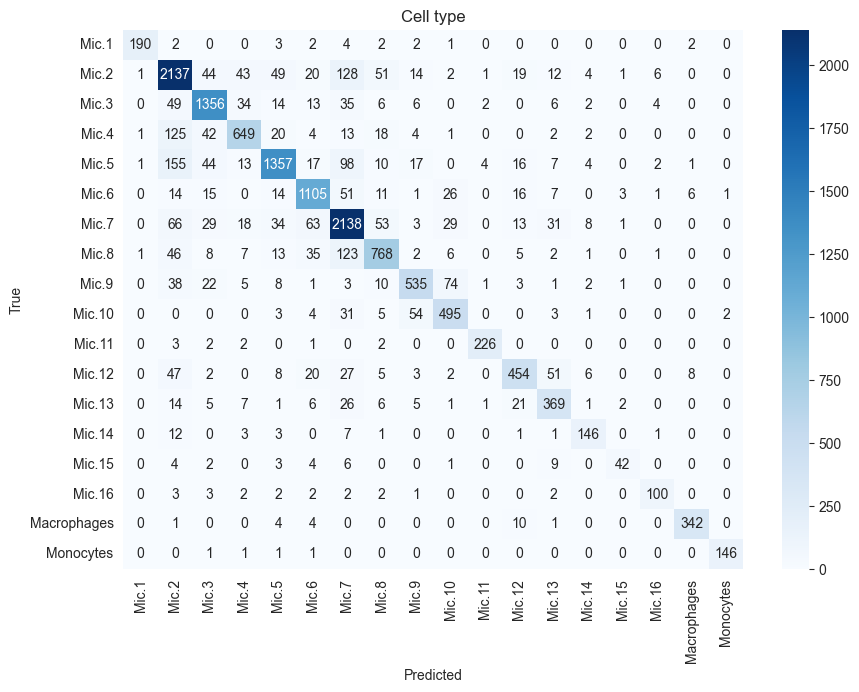

In [13]:
X_test = testCerad.X
y_cerad = testCerad.obs["individualID"].map(ceraddict)
y_cell = testCerad.obs["state"].values
tensor = torch.tensor(X_test, dtype=torch.float32)
ceradmodel = ceradmodel.eval()

output = ceradmodel(tensor)
preds = output[1].argmax(dim=1)

print(len(preds))

plot_confusion_matrix(y_cell, preds, stateDict.keys(), "Cell type")

In [28]:
from collections import Counter

correctCells = []
totalCells = []
braakScoreCells = []

true = []
pred = []

for id in ceradids:
    cells = testCerad[testCerad.obs["individualID"] == id]
    cellTensor = torch.tensor(cells.X, dtype=torch.float32)
    ceradsc = ceraddict[id]
    cell_types = cells.obs["state"].values
    true.append(ceradsc)
    
    with torch.no_grad():
        output = ceradmodel(cellTensor)
        pred_class = (output[0] > 0.5).sum(dim=1).numpy()
        pred_cells = output[1].argmax(dim=1).numpy()
    
    classCounts = dict(Counter(pred_class))
    if ceradsc in classCounts.keys():
        predMax = classCounts[ceradsc]
    else:
        predMax = 0
    #predMax = classCounts[braaksc]
    guess = max(classCounts, key=classCounts.get)
    pred.append(guess)
    if guess in classCounts.keys():
        guessCount = classCounts[guess]
    else:
        guessCount = 0
    total = sum(classCounts.values())
    
    #create mask of for which cells braak score is precicted correctly
    mask = (pred_class == ceradsc)
    
    cellacc = (pred_cells == cell_types).sum()
    if guess == ceradsc:

        print(f"ID: {id}, CERAD score: {ceradsc}, Predicted score: {guess}, Count: {predMax}/{total} ({predMax/total:.2%}), Cell type accuracy: {cellacc}/{len(cell_types)} ({cellacc/len(cell_types):.2%})")
        #plot_confusion_matrix(cell_types, pred_cells, stateDict.keys(), f"Cell type for ID {id}")

        correctCells.extend(pred_cells)
    braakScoreCells.extend(pred_cells[mask])
    totalCells.extend(pred_cells)
#plot_confusion_matrix(true, pred, [1, 2, 3, 4], "Braak score")

correctCounts = pd.Series(correctCells).value_counts()
totalCounts = pd.Series(totalCells).value_counts()
braakScoreCounts = pd.Series(braakScoreCells).value_counts()
# print("Correct counts", correctCounts)
# print("Total counts", totalCounts)

print(f"Correct cells: \n{correctCounts}")
print(f"Braak score counts: \n{braakScoreCounts}")
print(f"Total cells: \n{totalCounts}")

ID: R4078277, CERAD score: 0, Predicted score: 0, Count: 237/495 (47.88%), Cell type accuracy: 437/495 (88.28%)
ID: R8998310, CERAD score: 1, Predicted score: 1, Count: 145/339 (42.77%), Cell type accuracy: 300/339 (88.50%)
ID: R1830086, CERAD score: 1, Predicted score: 1, Count: 68/148 (45.95%), Cell type accuracy: 120/148 (81.08%)
ID: R3078606, CERAD score: 1, Predicted score: 1, Count: 138/265 (52.08%), Cell type accuracy: 246/265 (92.83%)
ID: R5992638, CERAD score: 1, Predicted score: 1, Count: 83/237 (35.02%), Cell type accuracy: 192/237 (81.01%)
ID: R7903817, CERAD score: 1, Predicted score: 1, Count: 120/275 (43.64%), Cell type accuracy: 220/275 (80.00%)
ID: R9245150, CERAD score: 1, Predicted score: 1, Count: 87/192 (45.31%), Cell type accuracy: 166/192 (86.46%)
ID: R3825485, CERAD score: 1, Predicted score: 1, Count: 103/223 (46.19%), Cell type accuracy: 185/223 (82.96%)
ID: R2488731, CERAD score: 1, Predicted score: 1, Count: 182/389 (46.79%), Cell type accuracy: 291/389 (74.

In [30]:
# Cogdx mic 11 very good, mic16, 12, 13 good, mic 14 very bad
testCogdx = microglia[microglia.obs["individualID"].isin(cogdxids)]
testCogdx = testCogdx[:, cogdxindex]
testCogdx.obs["state"] = testCogdx.obs["state"].map(stateDict)
X_test = testCogdx.X
y_cogdx = testCogdx.obs["individualID"].map(cogdxdict)
y_cell = testCogdx.obs["state"].values


C:\Users\limmi\AppData\Local\Temp\ipykernel_18400\2434531022.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  testCogdx.obs["state"] = testCogdx.obs["state"].map(stateDict)


16015


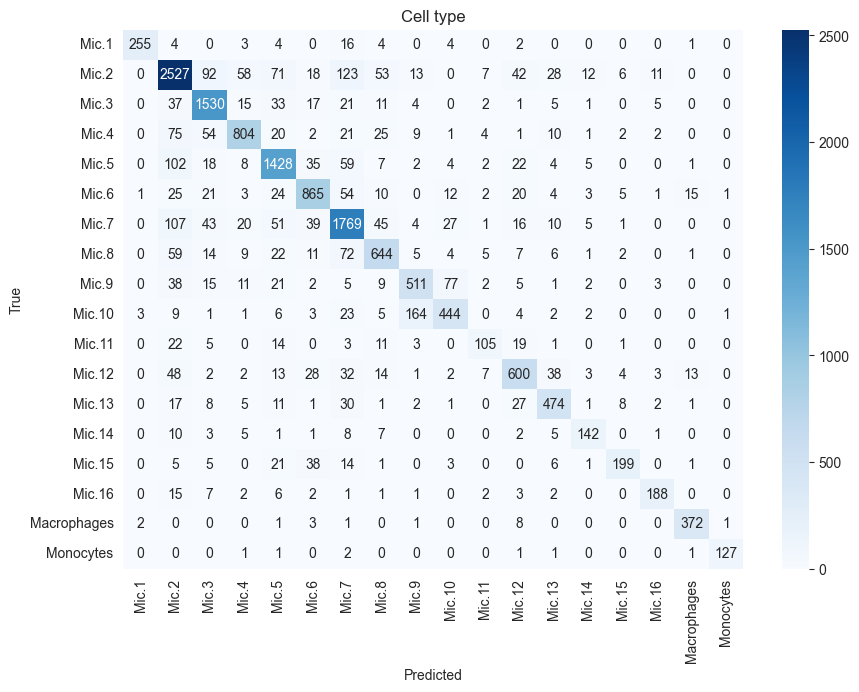

In [31]:
tensor = torch.tensor(X_test, dtype=torch.float32)
cogdxmodel = cogdxmodel.eval()

output = cogdxmodel(tensor)
preds = output[1].argmax(dim=1)

print(len(preds))

plot_confusion_matrix(y_cell, preds, stateDict.keys(), "Cell type")

In [32]:
from collections import Counter

correctCells = []
totalCells = []
braakScoreCells = []

true = []
pred = []

for id in cogdxids:
    cells = testCogdx[testCogdx.obs["individualID"] == id]
    cellTensor = torch.tensor(cells.X, dtype=torch.float32)
    cogdxsc = cogdxdict[id]
    cell_types = cells.obs["state"].values
    true.append(cogdxsc)

    with torch.no_grad():
        output = cogdxmodel(cellTensor)
        pred_class = (output[0] > 0.5).sum(dim=1).numpy()
        pred_cells = output[1].argmax(dim=1).numpy()

    classCounts = dict(Counter(pred_class))
    if cogdxsc in classCounts.keys():
        predMax = classCounts[cogdxsc]
    else:
        predMax = 0
    #predMax = classCounts[braaksc]
    guess = max(classCounts, key=classCounts.get)
    pred.append(guess)
    if guess in classCounts.keys():
        guessCount = classCounts[guess]
    else:
        guessCount = 0
    total = sum(classCounts.values())

    #create mask of for which cells braak score is precicted correctly
    mask = (pred_class == cogdxsc)

    cellacc = (pred_cells == cell_types).sum()
    if guess == cogdxsc:
        # print(f"ID: {id}, Braak score: {braaksc}, Predicted score: {guess}, Count: {predMax}/{total} ({predMax/total:.2%}), Cell type accuracy: {cellacc}/{len(cell_types)} ({cellacc/len(cell_types):.2%})")

        correctCells.extend(pred_cells)
    braakScoreCells.extend(pred_cells[mask])
    totalCells.extend(pred_cells)
# plot_confusion_matrix(true, pred, [1, 2, 3], "Braak score")

correctCounts = pd.Series(correctCells).value_counts()
totalCounts = pd.Series(totalCells).value_counts()
braakScoreCounts = pd.Series(braakScoreCells).value_counts()
# print("Correct counts", correctCounts)
# print("Total counts", totalCounts)

print(f"Correct cells: \n{correctCounts}")
print(f"Braak score counts: \n{braakScoreCounts}")
print(f"Total cells: \n{totalCounts}")

Correct cells: 
1     1318
6      959
4      925
2      882
3      533
7      519
11     494
8      479
5      475
9      278
12     277
0      232
16     192
15     129
10     107
17      82
13      37
14      31
Name: count, dtype: int64
Braak score counts: 
1     1078
6      844
2      694
4      671
3      404
5      368
7      337
11     336
8      272
12     222
9      217
16     129
15     104
0       84
17      58
10      52
14      39
13      34
Name: count, dtype: int64
Total cells: 
1     3100
6     2254
2     1818
4     1748
5     1065
3      947
7      848
11     780
8      720
12     597
9      579
16     406
0      261
14     228
15     216
13     179
10     139
17     130
Name: count, dtype: int64


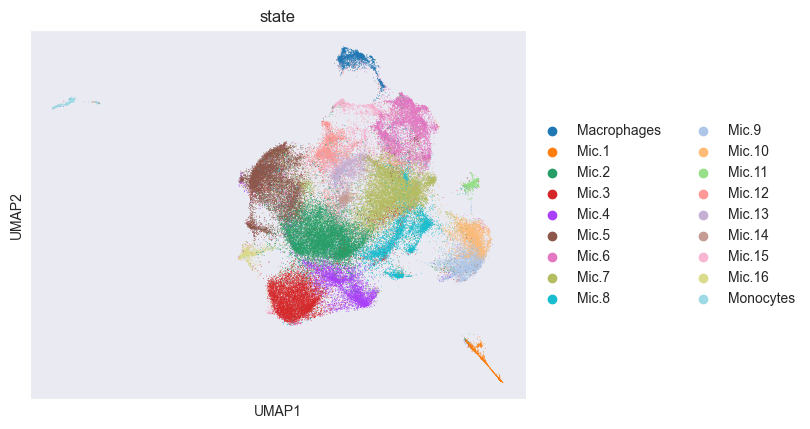

In [8]:
#umap of the microglia cells
sc.pl.embedding(microglia, "umap", color="state")
